<a href="https://colab.research.google.com/github/JoungMinJu/lab_study/blob/main/%EC%84%A0%ED%98%95%EB%8C%80%EC%88%98%ED%95%99%EC%8A%A4%ED%84%B0%EB%94%94_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as im

src=im.imread('flower3.jpg')

In [ ]:
A=src[:,:,0]

In [ ]:
#n_elemts개수만큼의 계수에 해당하는 요소를 사용하는 재구성
def reconstruct(U,Sigma,VT,n_elements):
  Sigma=Sigma[:,:n_elements]
  VT=VT[:n_elements,:]
  B=np.matmul(U,np.matmul(Sigma,VT))
  return B

In [ ]:
plt.rcParams.update({'xtick.major.width':0,'xtick.labelsize':0,'ytick.major.width':0,'ytick.labelsize':0,'axes.linewidth':0})

In [ ]:
U,s,VT=np.linalg.svd(A)
m,n=A.shape
Sigma=np.zeros((m,n))
k=np.size(s)
Sigma[:k,:k]=np.diag(s)

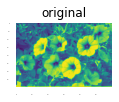

In [ ]:
plt.subplot(3,3,1)
plt.title('original')
plt.imshow(A)

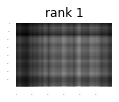

In [ ]:
plt.subplot(3,3,2)
plt.title("rank 1")
B=reconstruct(U,Sigma,VT,1)
plt.imshow(B,cmap='gray')

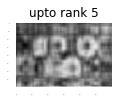

In [ ]:
plt.subplot(3,3,3)
plt.title("upto rank 5")
B=reconstruct(U,Sigma,VT,5)
plt.imshow(B,cmap='gray')

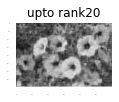

In [ ]:
plt.subplot(3,3,4)
plt.title("upto rank20")
B=reconstruct(U,Sigma,VT,20)
plt.imshow(B,cmap='gray')

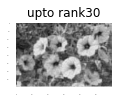

In [ ]:
plt.subplot(3,3,5)
plt.title("upto rank30")
B=reconstruct(U,Sigma,VT,30)
plt.imshow(B,cmap='gray')

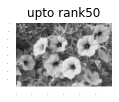

In [ ]:
plt.subplot(3,3,6)
plt.title("upto rank50")
B=reconstruct(U,Sigma,VT,50)
plt.imshow(B,cmap='gray')

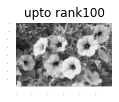

In [ ]:
plt.subplot(3,3,7)
plt.title("upto rank100")
B=reconstruct(U,Sigma,VT,100)
plt.imshow(B,cmap='gray')

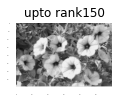

In [ ]:
plt.subplot(3,3,8)
plt.title("upto rank150")
B=reconstruct(U,Sigma,VT,150)
plt.imshow(B,cmap='gray')

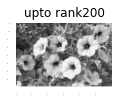

In [ ]:
plt.subplot(3,3,9)
plt.title("upto rank200")
B=reconstruct(U,Sigma,VT,200)
plt.imshow(B,cmap='gray')

In [ ]:
#호모그래피 변환 출력하는 코드


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#corners1의 좌표를 corners2의 좌표로 변환하는 호모그래피 행렬 xform을 구하기
def compute_xform(corners1, corners2):
  A=[ ]
  for i in range(4):
    x1,y1=corners1[i]
    x2,y2=corners2[i]
    A.append([x1,y1,1,0,0,0,-x2*x1,-x2*y1,-x2])
    A.append([0,0,0,x1,y1,1,-y2*x1,-y2*y1,-y2])
  A=np.asarray(A)
  U,S,V=np.linalg.svd(A)
  xform=V[-1,:]
  xform=np.reshape(xform,(3,3))
  return xform

def transform_image(xform,image1, corners1, corners2):
  warped=cv2.warpPerspective(image1,xform,(500,500))
  h1,w1=image1.shape[:2] #원본 영상의 높이와 폭
  h2,w2=warped.shape[:2] #변환된 영상의 높이와 폭

  out_image=np.zeros((max(h1,h2),w1+w2,3),dtype=np.uint8)
  out_image[:h1,:w1,:3]=image1
  out_image[:h2,w1:w1+w2,:3]=warped
  for i in range(4):#대응 위치 표시
    c1=corners1[i]
    c2=(corners2[i][0]+w1, corners2[i][1])
    cv2.circle(out_image, c1, radius=2, color=(0,255,0),thickness=2)
    cv2.circle(out_image, c2,radius=2, color=(30,255,255),thickness=2)
    cv2.line(out_image, c1,c2,color=(0,0,255),thickness=1)
    cv2.imshow('original and transfored images',out_image)
    cv2.waitKey(0)
  



In [ ]:
def main():
  img_path1='cameraman1.png'
  img1=cv2.imread(img_path1,cv2.IMREAD_COLOR) #영상 파일 읽어들이기
  corners1=[(122,51),(26,300),(454,131),(330,414)]
  corners2=[(50,50),(50,450),(450,50),(450,450)]
  xform=compute_xform(corners1, corners2)
  print(xform)
  transform_image(xform, img1, corners1, corners2)


In [ ]:
if __name__=='__main__':
  main()

[[-9.64842123e-03 -3.66657653e-03  9.92332018e-01]
 [ 2.36778020e-03 -1.05518930e-02 -1.22493413e-01]
 [-3.43465862e-06 -2.58271519e-07 -7.00321529e-03]]


DisabledFunctionError: ignored